<center> <h3 style="color: #D22B2B"> Bank Loan Approval Analysis </h3> </center>

<div style="background-color:#E3F6FC; padding:10px; font-size:15px">
    
<h4 style="color: #D22B2B"> Dataset Overview </h4>
This dataset contains information about bank loan applications and their approval status.

| Feature | Description | Type |
|---------|-------------|------|
| **Loan_ID** | Unique identifier for each loan application | Categorical (Identifier) |
| **Gender** | Applicant's gender (Male/Female) | Categorical (Binary) |
| **Married** | Marital status (Yes/No) | Categorical (Binary) |
| **Dependents** | Number of dependents (0, 1, 2, 3+) | Categorical (Ordinal) |
| **Education** | Education level (Graduate/Not Graduate) | Categorical (Binary) |
| **Self_Employed** | Self-employment status (Yes/No) | Categorical (Binary) |
| **ApplicantIncome** | Monthly income of applicant (in currency units) | Numerical (Continuous) |
| **CoapplicantIncome** | Monthly income of co-applicant (in currency units) | Numerical (Continuous) |
| **LoanAmount** | Loan amount requested (in thousands) | Numerical (Continuous) |
| **Loan_Amount_Term** | Loan repayment term (in months) | Numerical (Discrete) |
| **Credit_History** | Credit history meets guidelines (1=Yes, 0=No) | Categorical (Binary) |
| **Property_Area** | Property location (Urban/Semiurban/Rural) | Categorical (Nominal) |
| **Loan_Status** | Loan approval status (Y=Approved, N=Rejected) - **TARGET VARIABLE** | Categorical (Binary) |

<div style="background-color:#E3F6FC; padding:10px; font-size:15px">

<CENTER> <h3 style="color: navy"> Data Loading, Initial Exploration and Feature Engineering </h3>

In [571]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [572]:
#load data and define NaN values

df = pd.read_csv('/Users/saafan/Downloads/Loan Approval Dataset.csv', na_values=[' ','  ','   ','na','nan','NaN','NA','nan','NAN','EMPTY','Empty','empty','?'])
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,36000.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not-Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,rban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [573]:
df.shape

(983, 13)

In [574]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            983 non-null    object 
 1   Gender             954 non-null    object 
 2   Married            980 non-null    object 
 3   Dependents         958 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      923 non-null    object 
 6   ApplicantIncome    983 non-null    int64  
 7   CoapplicantIncome  983 non-null    float64
 8   LoanAmount         956 non-null    float64
 9   Loan_Amount_Term   958 non-null    float64
 10  Credit_History     904 non-null    float64
 11  Property_Area      980 non-null    object 
 12  Loan_Status        616 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 100.0+ KB


In [575]:
# drop missing target values

df.dropna(subset=['Loan_Status'], inplace=True)

In [576]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 616 entries, 0 to 982
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            616 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            613 non-null    object 
 3   Dependents         601 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      579 non-null    object 
 6   ApplicantIncome    616 non-null    int64  
 7   CoapplicantIncome  616 non-null    float64
 8   LoanAmount         594 non-null    float64
 9   Loan_Amount_Term   597 non-null    float64
 10  Credit_History     566 non-null    float64
 11  Property_Area      613 non-null    object 
 12  Loan_Status        616 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.4+ KB


In [577]:
# 'Credit_History' should not be a number

df['Credit_History']= df['Credit_History'].astype(object)

In [578]:
# created a new variable to get the total income

df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [579]:
# I'm gonna use total income so I dropped ApplicantIncome CoapplicantIncome

df.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 616 entries, 0 to 982
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Loan_ID           616 non-null    object 
 1   Gender            598 non-null    object 
 2   Married           613 non-null    object 
 3   Dependents        601 non-null    object 
 4   Education         614 non-null    object 
 5   Self_Employed     579 non-null    object 
 6   LoanAmount        594 non-null    float64
 7   Loan_Amount_Term  597 non-null    float64
 8   Credit_History    566 non-null    object 
 9   Property_Area     613 non-null    object 
 10  Loan_Status       616 non-null    object 
 11  TotalIncome       616 non-null    float64
dtypes: float64(3), object(9)
memory usage: 62.6+ KB


In [580]:
# Income_to_Loan_Ratio is added to capture the applicant's repayment capacity

df['Income_to_Loan_Ratio'] = df['TotalIncome'] / df['LoanAmount']
df['Income_to_Loan_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 616 entries, 0 to 982
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               616 non-null    object 
 1   Gender                598 non-null    object 
 2   Married               613 non-null    object 
 3   Dependents            601 non-null    object 
 4   Education             614 non-null    object 
 5   Self_Employed         579 non-null    object 
 6   LoanAmount            594 non-null    float64
 7   Loan_Amount_Term      597 non-null    float64
 8   Credit_History        566 non-null    object 
 9   Property_Area         613 non-null    object 
 10  Loan_Status           616 non-null    object 
 11  TotalIncome           616 non-null    float64
 12  Income_to_Loan_Ratio  594 non-null    float64
dtypes: float64(4), object(9)
memory usage: 67.4+ KB


/var/folders/kg/xj52r_ts1fvbdqmpp00q6r0r0000gn/T/ipykernel_94474/727293099.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income_to_Loan_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)


In [581]:
df.describe()

,LoanAmount,Loan_Amount_Term,TotalIncome,Income_to_Loan_Ratio
count,594.000000,5.970000e+02,616.000000,594.000000
mean,146.060606,6.431558e+03,7022.626493,51.012022
std,86.142611,1.473290e+05,6448.977889,38.098225
min,-115.000000,1.200000e+01,1442.000000,-53.043478
25%,100.000000,3.600000e+02,4166.000000,35.513864
50%,128.000000,3.600000e+02,5416.500000,41.276105
75%,168.000000,3.600000e+02,7536.500000,51.649012
max,700.000000,3.600000e+06,81000.000000,396.366667


<div style="background-color:#E3F6FC; padding:10px; font-size:15px">

<CENTER> <h3 style="color: navy"> Inconsistencies Check, Cleaning and Outlier Treatment </h3>

In [582]:
# checking duplicate values using loanID

print(df.duplicated(subset='Loan_ID').sum())
print(df[df.duplicated(subset='Loan_ID')])

2
      Loan_ID Gender Married Dependents Education Self_Employed  LoanAmount  \
981  LP001028    NaN     Yes          2  Graduate            No       200.0   
982  LP001029    NaN      No          0  Graduate            No       114.0   

     Loan_Amount_Term Credit_History Property_Area Loan_Status  TotalIncome  \
981             360.0            1.0         Urban           Y       8076.0   
982             360.0            1.0         Rural           N       4693.0   

     Income_to_Loan_Ratio  
981             40.380000  
982             41.166667  


In [583]:
# dropped duplicate values using loanID

df.drop_duplicates(subset='Loan_ID', inplace=True)
df.drop(columns=['Loan_ID'], inplace=True)

In [584]:
# splitting the data into numerical and categorical features

Num_vars= df.select_dtypes(include=['int','float']).columns.tolist()
Cat_vars= df.select_dtypes(include=['object']).columns.tolist()

In [585]:
# checking categorical features inconsistencies 

for var in Cat_vars:
    print("\nColumn: " + var)
    print(df[var].value_counts(dropna=False))


Column: Gender
Gender
Male      484
Female    110
NaN        16
M           1
male        1
F           1
female      1
Name: count, dtype: int64

Column: Married
Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64

Column: Dependents
Dependents
0      345
1      102
2      101
3+      51
NaN     15
Name: count, dtype: int64

Column: Education
Education
Graduate        477
Not Graduate    133
NaN               2
graduate          1
Not-Graduate      1
Name: count, dtype: int64

Column: Self_Employed
Self_Employed
No     496
Yes     81
NaN     37
Name: count, dtype: int64

Column: Credit_History
Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64

Column: Property_Area
Property_Area
Semiurban    231
Urban        200
Rural        179
NaN            3
rban           1
Name: count, dtype: int64

Column: Loan_Status
Loan_Status
Y    422
N    192
Name: count, dtype: int64


In [586]:
# treated categorical features inconsistencies 

df['Gender'].replace({'M':'Male','male':'Male','F':'Female','female':'Female'}, inplace=True) 
print(df['Gender'].value_counts(dropna=False))

Gender
Male      486
Female    112
NaN        16
Name: count, dtype: int64


/var/folders/kg/xj52r_ts1fvbdqmpp00q6r0r0000gn/T/ipykernel_94474/1805158533.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'M':'Male','male':'Male','F':'Female','female':'Female'}, inplace=True)


In [587]:
df['Education'].replace({'graduate':'Graduate', 'Not-Graduate':'Not Graduate'}, inplace=True)
print(df['Education'].value_counts(dropna=False))

Education
Graduate        478
Not Graduate    134
NaN               2
Name: count, dtype: int64


/var/folders/kg/xj52r_ts1fvbdqmpp00q6r0r0000gn/T/ipykernel_94474/2312086206.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Education'].replace({'graduate':'Graduate', 'Not-Graduate':'Not Graduate'}, inplace=True)


In [588]:
df['Property_Area'].replace({'rban':'Urban'}, inplace=True)
print(df['Property_Area'].value_counts(dropna=False))

Property_Area
Semiurban    231
Urban        201
Rural        179
NaN            3
Name: count, dtype: int64


/var/folders/kg/xj52r_ts1fvbdqmpp00q6r0r0000gn/T/ipykernel_94474/569211498.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Property_Area'].replace({'rban':'Urban'}, inplace=True)


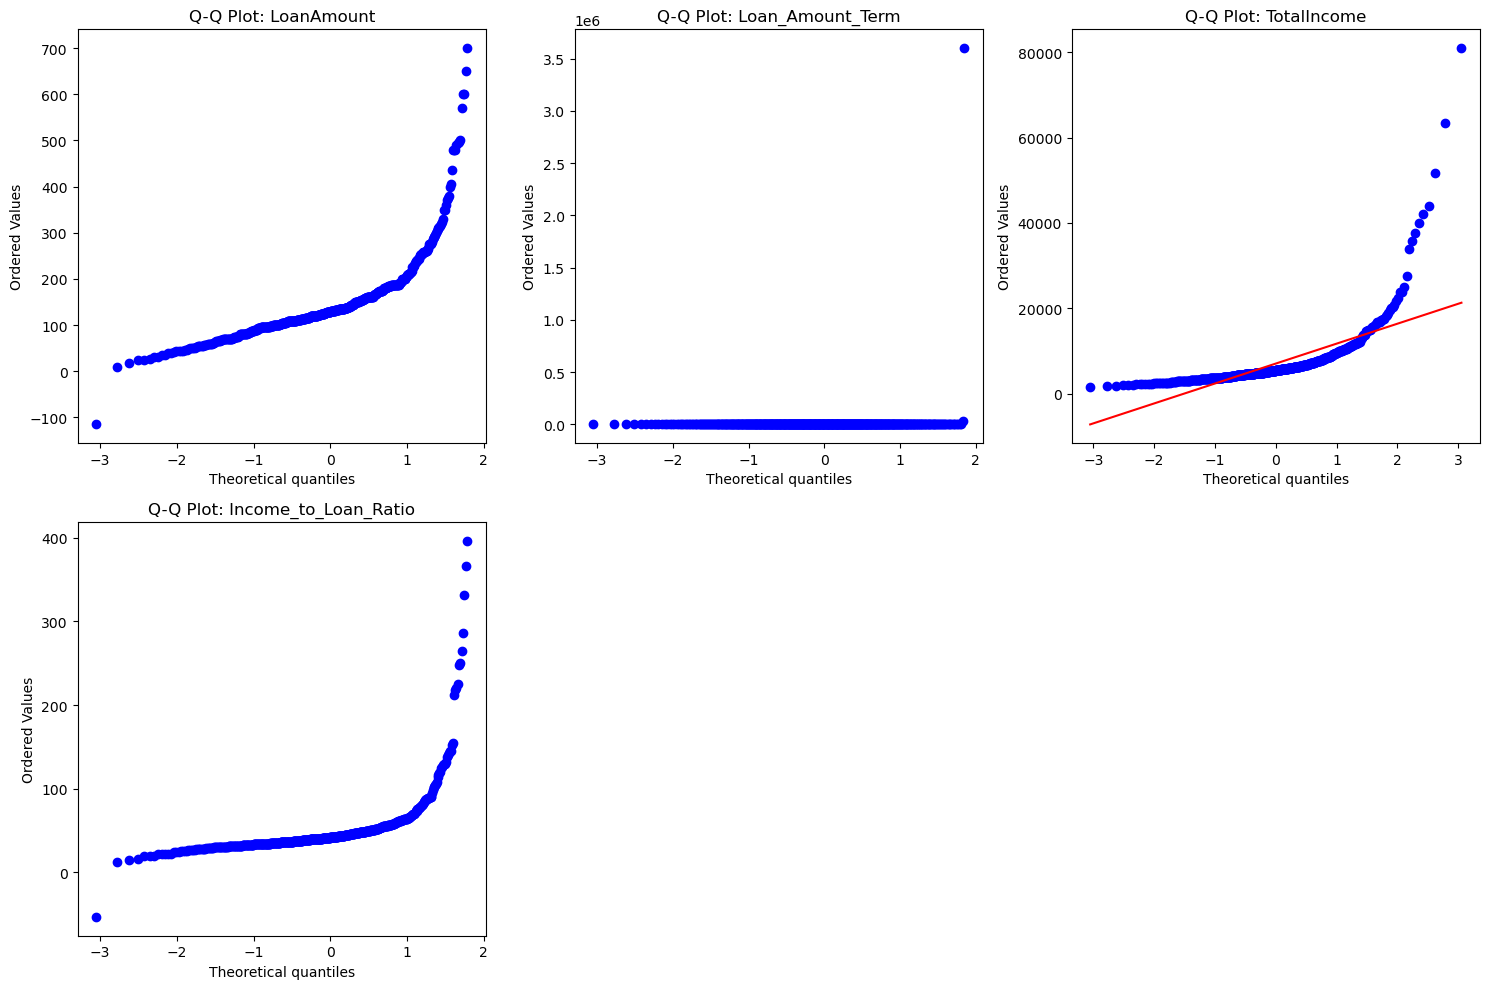

In [589]:
## QQ PLot to Chech Normality and Skewness


n_rows = 2
n_cols = 3

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize = (15, 10))
axes = axes.flatten()

for idx, name in enumerate(Num_vars):
    probplot(df[name], dist = "norm", plot = axes[idx])
    axes[idx].set_title(f"Q-Q Plot: {name}")

for i in range(len(Num_vars), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

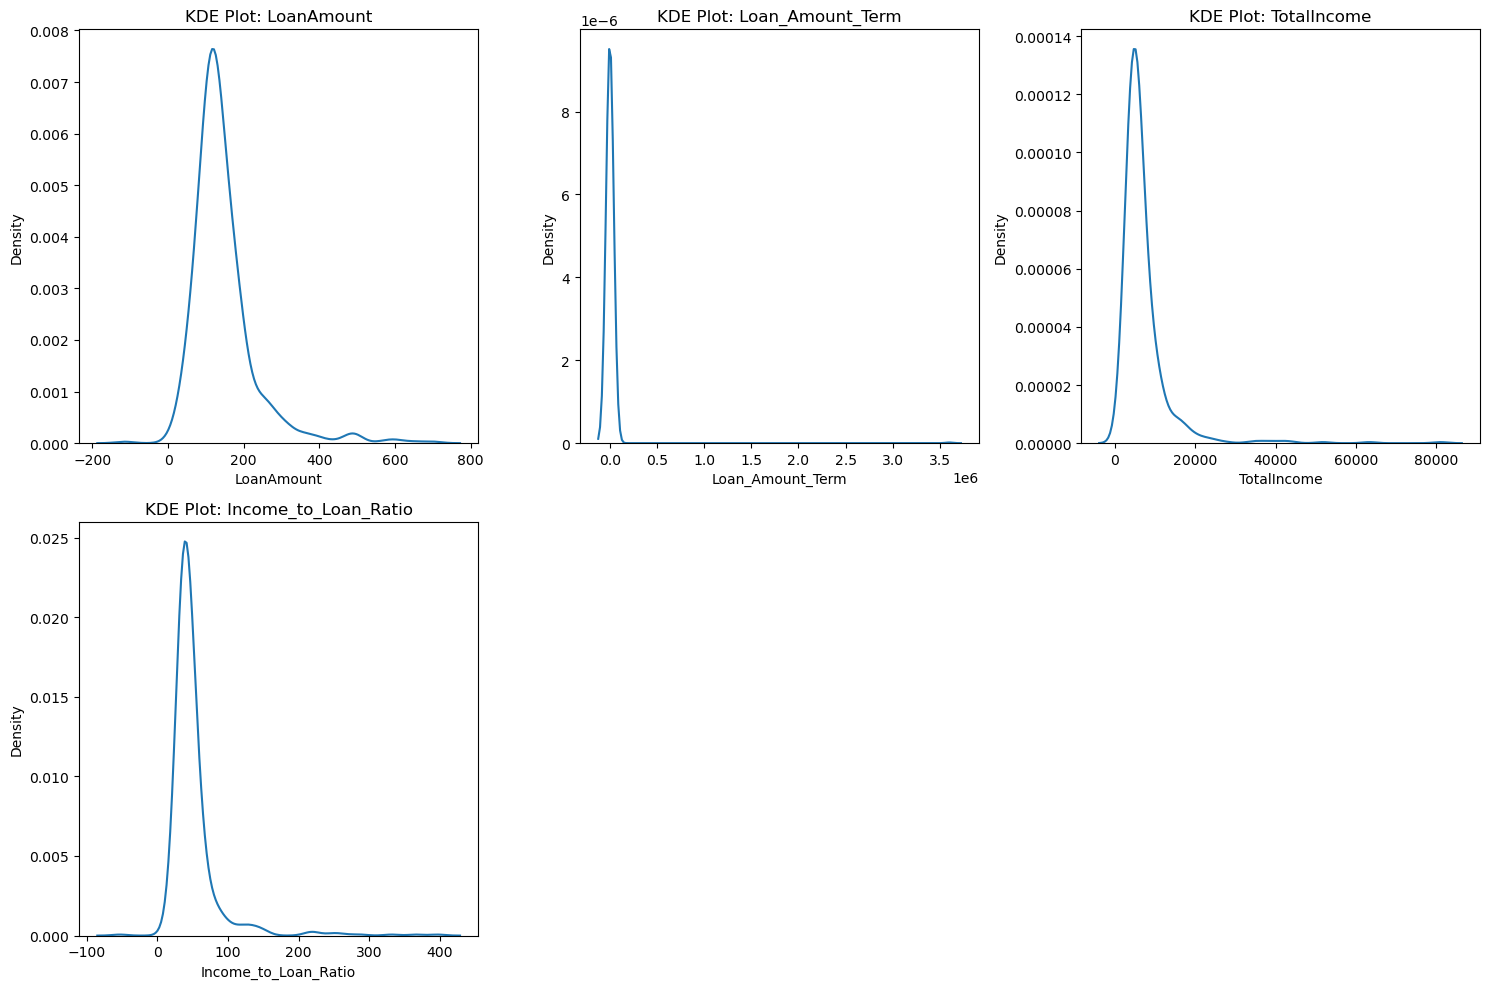

In [590]:
# Kernel Density Plot to Check Distribution


n_rows = 2
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize = (15, 10))
axes = axes.flatten() 

for idx, name in enumerate(Num_vars):
    sns.kdeplot(df[name], ax = axes[idx])
    axes[idx].set_title(f"KDE Plot: {name}")

for i in range(len(Num_vars), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [591]:
# Shapiro Normality Test, to be 100% Sure

for column in Num_vars:
    stat, p = shapiro(df[column].dropna())  # Drop missing values
    if p > 0.05:
        print(f"{column}: Probably Normal (p = {p:.3f})")
    else:
        print(f"{column}: Probably Not Normal (p = {p:.3f})")

LoanAmount: Probably Not Normal (p = 0.000)
Loan_Amount_Term: Probably Not Normal (p = 0.000)
TotalIncome: Probably Not Normal (p = 0.000)
Income_to_Loan_Ratio: Probably Not Normal (p = 0.000)


In [592]:
# checing outliers using percentile base method


for var in Num_vars:
    outliers = []
    p1, p2 = np.nanpercentile(df[var],[0.5,99.5])
    for cell in df[var]:
        if cell < p1 or cell > p2:
            outliers.append(cell)
    print(var)
    print("Number of outliers:", len(outliers))
    print(outliers)
    print('--------------------------------------------------------------------------------------------------')


## Most extreme values were actually useful; tried 90th, 95th, and 99th percentiles, and found very few values that we needed to consider as outliers and treat.

LoanAmount
Number of outliers: 5
[17.0, -115.0, 650.0, 700.0, 9.0]
--------------------------------------------------------------------------------------------------
Loan_Amount_Term
Number of outliers: 5
[36000.0, 3600000.0, 36.0, 12.0, 36.0]
--------------------------------------------------------------------------------------------------
TotalIncome
Number of outliers: 8
[1442.0, 51763.0, 43897.0, 1950.0, 63337.0, 1830.0, 81000.0, 1880.0]
--------------------------------------------------------------------------------------------------
Income_to_Loan_Ratio
Number of outliers: 6
[-53.04347826086956, 365.80833333333334, 14.444444444444445, 12.090196078431372, 331.55, 396.3666666666667]
--------------------------------------------------------------------------------------------------


<Axes: >

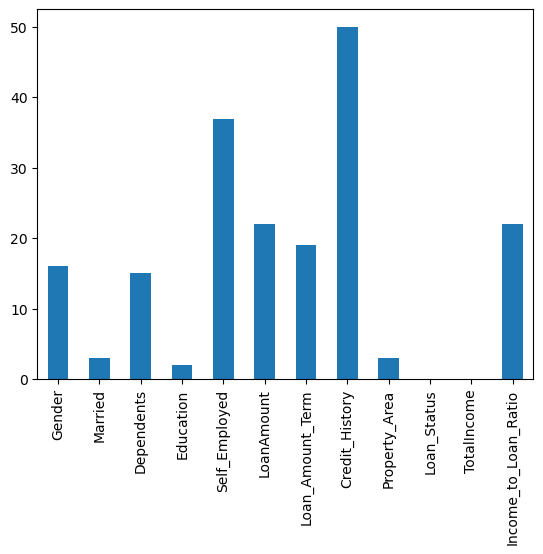

In [593]:
# check missing values

df.isnull().sum().plot(kind='bar')

In [594]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                598 non-null    object 
 1   Married               611 non-null    object 
 2   Dependents            599 non-null    object 
 3   Education             612 non-null    object 
 4   Self_Employed         577 non-null    object 
 5   LoanAmount            592 non-null    float64
 6   Loan_Amount_Term      595 non-null    float64
 7   Credit_History        564 non-null    object 
 8   Property_Area         611 non-null    object 
 9   Loan_Status           614 non-null    object 
 10  TotalIncome           614 non-null    float64
 11  Income_to_Loan_Ratio  592 non-null    float64
dtypes: float64(4), object(8)
memory usage: 62.4+ KB


In [595]:
# Decided to drop NaN values, as this will not significantly affect model building and will improve efficiency 

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 465 entries, 1 to 613
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                465 non-null    object 
 1   Married               465 non-null    object 
 2   Dependents            465 non-null    object 
 3   Education             465 non-null    object 
 4   Self_Employed         465 non-null    object 
 5   LoanAmount            465 non-null    float64
 6   Loan_Amount_Term      465 non-null    float64
 7   Credit_History        465 non-null    object 
 8   Property_Area         465 non-null    object 
 9   Loan_Status           465 non-null    object 
 10  TotalIncome           465 non-null    float64
 11  Income_to_Loan_Ratio  465 non-null    float64
dtypes: float64(4), object(8)
memory usage: 47.2+ KB


In [596]:
df.describe()

,LoanAmount,Loan_Amount_Term,TotalIncome,Income_to_Loan_Ratio
count,465.000000,4.650000e+02,465.000000,465.000000
mean,144.989247,8.160697e+03,6940.903054,51.760086
std,80.729125,1.669347e+05,6032.566993,40.804976
min,9.000000,3.600000e+01,1442.000000,12.090196
25%,100.000000,3.600000e+02,4124.000000,35.389610
50%,128.000000,3.600000e+02,5416.000000,41.662500
75%,170.000000,3.600000e+02,7660.000000,51.191388
max,600.000000,3.600000e+06,81000.000000,396.366667


In [597]:
for var in Num_vars:
    outliers = []
    p1, p2 = np.nanpercentile(df[var],[0.5,99.5])
    for cell in df[var]:
        if cell < p1 or cell > p2:
            outliers.append(cell)
    print(var)
    print("Number of outliers:", len(outliers))
    print(outliers)
    print('--------------------------------------------------------------------------------------------------')

LoanAmount
Number of outliers: 6
[25.0, 600.0, 570.0, 26.0, 600.0, 9.0]
--------------------------------------------------------------------------------------------------
Loan_Amount_Term
Number of outliers: 4
[36000.0, 3600000.0, 36.0, 36.0]
--------------------------------------------------------------------------------------------------
TotalIncome
Number of outliers: 6
[1442.0, 39999.0, 43897.0, 1950.0, 1963.0, 81000.0]
--------------------------------------------------------------------------------------------------
Income_to_Loan_Ratio
Number of outliers: 6
[365.80833333333334, 14.444444444444445, 12.090196078431372, 16.25, 331.55, 396.3666666666667]
--------------------------------------------------------------------------------------------------


In [598]:
# dropped extreme/outlier values

df = df[~df['Loan_Amount_Term'].isin([36000.0, 3600000.0])]

<div style="background-color:#e9f5f0; padding:10px; font-size:15px">

## Data Cleaning and Preprocessing Summary

The dataset underwent a thorough cleaning and preprocessing workflow to ensure it is consistent, reliable, and ready for analysis and modeling.

1. **Handling the Target Variable**  
   - All missing values in `Loan_Status`, our target variable (`y`), were removed to ensure a complete and reliable target for modeling.  

2. **Data Type Verification and Conversion**  
   - The data types of all columns were carefully examined to ensure they were appropriate for analysis.  
   - The `Credit_History` variable, originally numeric, was converted to an `object` type to correctly reflect its categorical nature.

3. **Feature Engineering**  
   - A new variable `TotalIncome` was created by summing `ApplicantIncome` and `CoapplicantIncome` to represent the total household income.  
   - A new feature `Income_to_Loan_Ratio` was created by dividing `TotalIncome` by `LoanAmount` to capture the applicant's repayment capacity.  
   - The original income columns (`ApplicantIncome` and `CoapplicantIncome`) were dropped to reduce redundancy and simplify the dataset.

4. **Duplicate and Identifier Handling**  
   - Duplicate rows were identified and removed based on the `Loan_ID` column to avoid bias and data leakage.  
   - After ensuring no duplicates remained, the `Loan_ID` column was dropped as it does not provide predictive value.

5. **Separation of Variable Types**  
   - The dataset was split into **categorical** and **numerical** variables to allow type-specific preprocessing and analysis.  
   - This separation ensures that each variable can be treated with appropriate methods (e.g., encoding for categorical variables, outlier detection for numerical variables).

6. **Consistency Checks and Corrections**  
   - Unique values of all categorical variables were examined to identify inconsistencies such as misspellings or irregular labels, and corrections were applied.  
   - Numerical variables were inspected for anomalies, extreme values, and unusual distributions to guide the treatment of outliers and missing values.

7. **Outlier Detection and Treatment**  
   - Normality tests and Q-Q plots were used to assess the distribution and skewness of numerical variables.  
   - Based on these analyses, it was determined that the data was neither normally distributed nor heavily skewed.  
   - Consequently, a **percentile-based method** was used to detect and treat outliers instead of Z-score or IQR methods.  
   - Most extreme values were legitimate and potentially informative for the model, so they were retained.  
   - Only a small number of extreme outliers deemed harmful to the analysis were removed, ensuring the dataset remained robust and representative.

---

**Conclusion:**  
The resulting dataset is clean, consistent, and free from duplicates, missing values, and irrelevant identifiers. Both categorical and numerical variables have been carefully prepared, including newly engineered features, making the data ready for exploratory data analysis (EDA) and subsequent predictive modeling.


<div style="background-color:#E3F6FC; padding:10px; font-size:15px">
<CENTER> <h3 style="color: navy"> Exploratory Data Analysis(EDA) </h3>

<Axes: xlabel='Loan_Status', ylabel='count'>

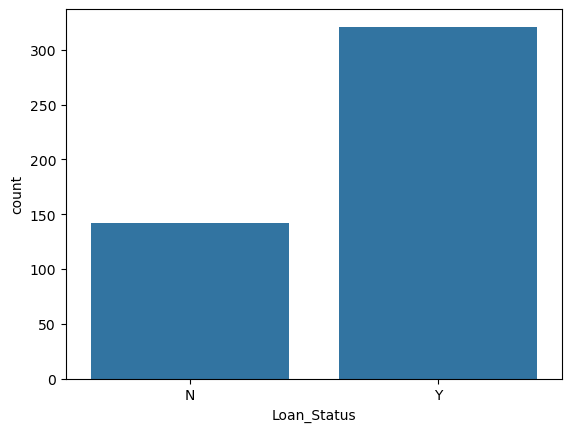

In [599]:
sns.countplot(data=df, x='Loan_Status')

In [600]:
pd.crosstab(df['Gender'], df['Loan_Status'], normalize='index') * 100

Loan_Status,N,Y
Gender,,
Female,36.904762,63.095238
Male,29.287599,70.712401


<Axes: ylabel='TotalIncome'>

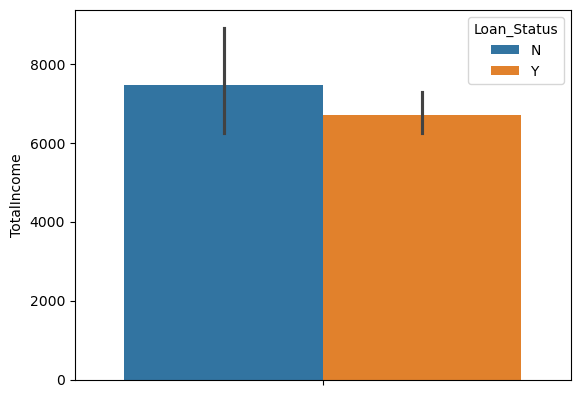

In [601]:
sns.barplot(data=df, y='TotalIncome', hue= 'Loan_Status')


<Axes: ylabel='LoanAmount'>

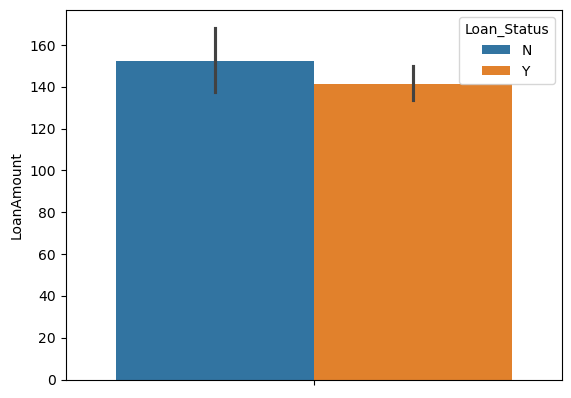

In [602]:
sns.barplot(data=df, y='LoanAmount', hue= 'Loan_Status')

<Axes: xlabel='TotalIncome', ylabel='LoanAmount'>

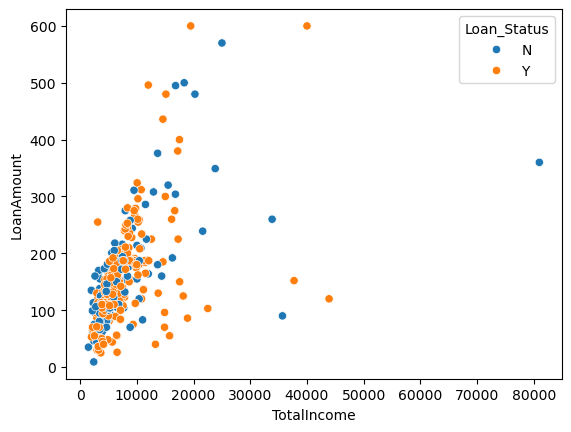

In [603]:
sns.scatterplot(data=df, x='TotalIncome', y='LoanAmount', hue='Loan_Status')


Crosstabs: 
Loan_Status          N          Y
Gender                           
Female       36.904762  63.095238
Male         29.287599  70.712401
###########################
Agg Mean, Median, Count and Std: 
              mean  median  count        std
Gender                                      
Female  128.547619   113.0     84  86.049076
Male    148.393140   130.0    379  78.799968


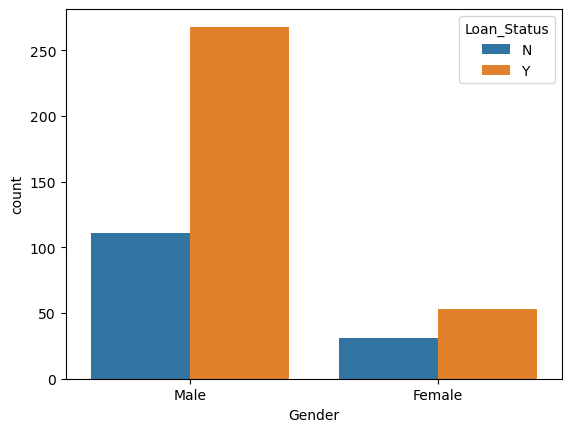

---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------


Crosstabs: 
Loan_Status          N          Y
Married                          
No           37.575758  62.424242
Yes          26.845638  73.154362
###########################
Agg Mean, Median, Count and Std: 
               mean  median  count        std
Married                                      
No       123.951515   115.0    165  63.327046
Yes      156.332215   133.0    298  86.452223


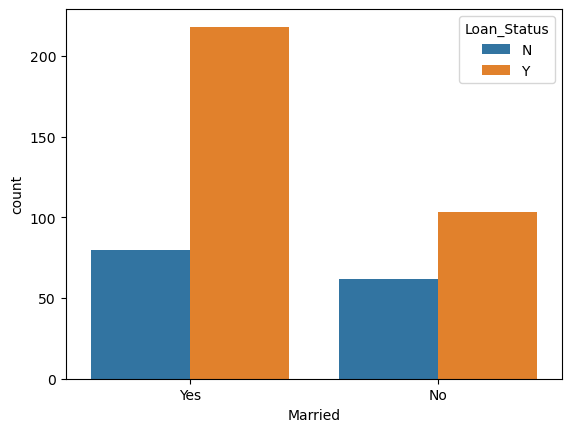

---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------


Crosstabs: 
Loan_Status          N          Y
Dependents                       
0            31.698113  68.301887
1            35.443038  64.556962
2            22.784810  77.215190
3+           30.000000  70.000000
###########################
Agg Mean, Median, Count and Std: 
                  mean  median  count         std
Dependents                                       
0           132.920755   121.0    265   66.632624
1           158.582278   137.0     79  100.490669
2           156.936709   136.0     79   74.725196
3+          172.225000   130.0     40  113.153286


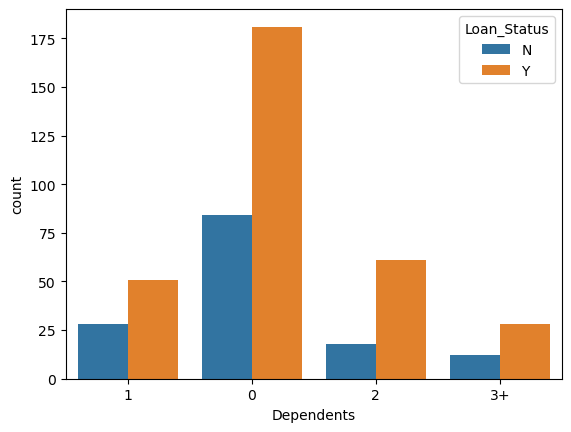

---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------


Crosstabs: 
Loan_Status           N          Y
Education                         
Graduate      29.155313  70.844687
Not Graduate  36.458333  63.541667
###########################
Agg Mean, Median, Count and Std: 
                   mean  median  count        std
Education                                        
Graduate      152.06267   133.0    367  86.268667
Not Graduate  117.00000   113.0     96  42.474760


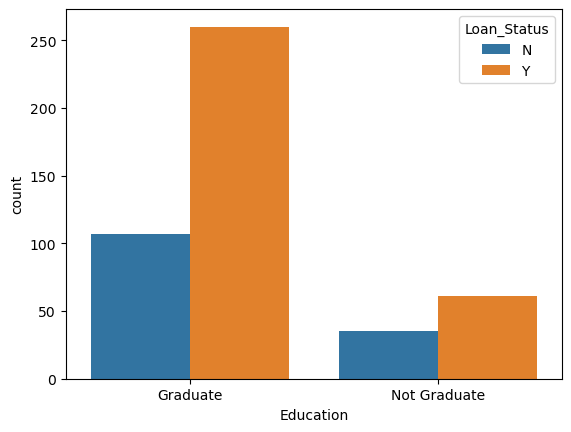

---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------


Crosstabs: 
Loan_Status            N          Y
Self_Employed                      
No             29.750000  70.250000
Yes            36.507937  63.492063
###########################
Agg Mean, Median, Count and Std: 
                     mean  median  count        std
Self_Employed                                      
No             140.162500   125.0    400  76.213235
Yes            174.190476   152.0     63  99.045421


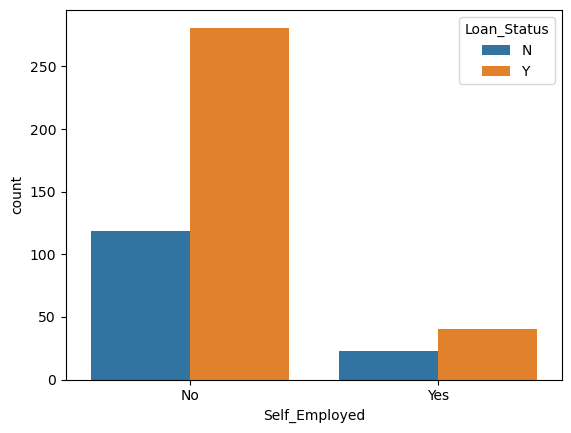

---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------


Crosstabs: 
Loan_Status             N          Y
Credit_History                      
0.0             89.855072  10.144928
1.0             20.304569  79.695431
###########################
Agg Mean, Median, Count and Std: 
                      mean  median  count        std
Credit_History                                      
0.0             151.376812   126.0     69  92.033578
1.0             143.639594   128.0    394  78.298197


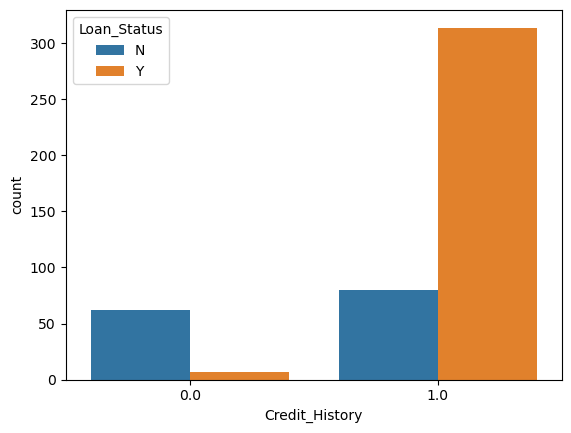

---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------


Crosstabs: 
Loan_Status            N          Y
Property_Area                      
Rural          37.037037  62.962963
Semiurban      21.621622  78.378378
Urban          36.363636  63.636364
###########################
Agg Mean, Median, Count and Std: 
                     mean  median  count        std
Property_Area                                      
Rural          156.459259   135.0    135  85.449100
Semiurban      146.032432   128.0    185  84.152547
Urban          132.174825   120.0    143  68.482476


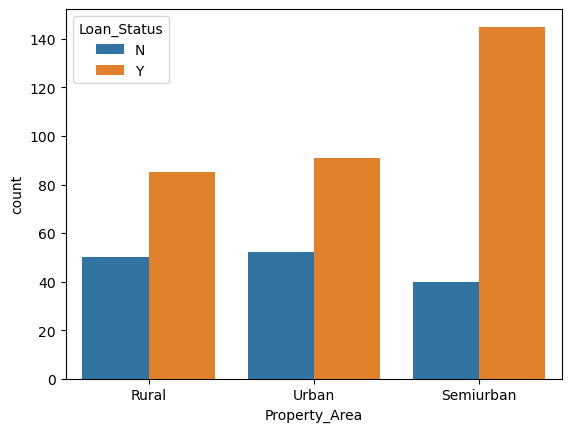

---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------


Crosstabs: 
Loan_Status      N      Y
Loan_Status              
N            100.0    0.0
Y              0.0  100.0
###########################
Agg Mean, Median, Count and Std: 
                   mean  median  count        std
Loan_Status                                      
N            152.507042   127.5    142  90.901923
Y            141.380062   128.0    321  75.239651


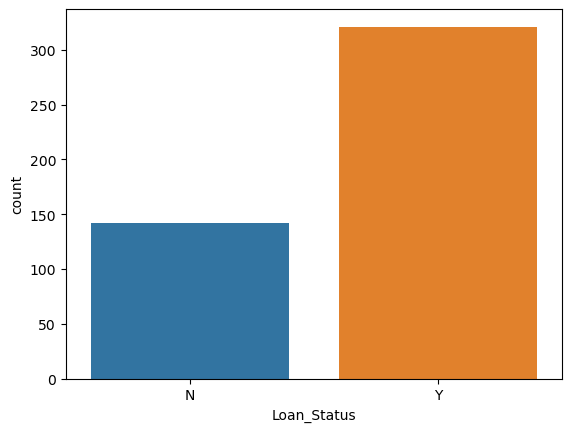

---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------




In [604]:
for col in Cat_vars:
    print('Crosstabs: ')
    print(pd.crosstab(df[col], df['Loan_Status'], normalize='index') * 100)
    print('###########################')
    print('Agg Mean, Median, Count and Std: ')
    print(df.groupby(col)['LoanAmount'].agg(['mean', 'median', 'count', 'std']))
    sns.countplot(data=df, x=col, hue='Loan_Status')
    plt.show()
    print('---------------------------------------------------------------------------------------------')
    print('---------------------------------------------------------------------------------------------')
    print('')
    print('')

<div style="background-color:#e9f5f0; padding:10px; font-size:15px">


## Summary of Categorical Variables and Loan Amount Analysis

The analysis of categorical variables against the target variable `Loan_Status` and the distribution of `LoanAmount` provided the following insights:

1. **Gender**  
   - A slightly higher proportion of males (70.7%) received loan approvals compared to females (63.1%).  
   - Male applicants also had a higher average loan amount (mean: 148.4) than females (mean: 128.5).

2. **Marital Status**  
   - Married applicants had a higher loan approval rate (73.2%) compared to unmarried applicants (62.4%).  
   - Average loan amounts were higher for married applicants (mean: 156.3) than unmarried ones (mean: 123.9).

3. **Dependents**  
   - Approval rates varied with the number of dependents, with applicants having 2 dependents showing the highest approval rate (77.2%).  
   - Average loan amounts increased with more dependents, reaching a mean of 172.2 for applicants with 3 or more dependents.

4. **Education**  
   - Graduates had a higher approval rate (70.8%) compared to non-graduates (63.5%).  
   - Graduates also received higher loan amounts on average (mean: 152.1) than non-graduates (mean: 117.0).

5. **Self-Employment**  
   - Non-self-employed applicants had slightly higher approval rates (70.2%) compared to self-employed applicants (63.5%).  
   - Self-employed applicants had higher average loan amounts (mean: 174.2) than non-self-employed applicants (mean: 140.2).

6. **Credit History**  
   - Applicants with a credit history of 1 had a much higher approval rate (79.7%) than those with no credit history (10.1%).  
   - Average loan amounts were slightly higher for applicants with no credit history (mean: 151.4) than those with credit history (mean: 143.6).

7. **Property Area**  
   - Applicants from Semiurban areas had the highest approval rate (78.4%), while Rural (63.0%) and Urban (63.6%) areas had lower rates.  
   - Loan amounts were highest for applicants from Rural areas (mean: 156.5) and lowest for Urban areas (mean: 132.2).

8. **Loan_Status vs LoanAmount**  
   - Applicants with approved loans (`Y`) had a slightly lower mean loan amount (141.4) compared to rejected loans (`N`, mean: 152.5).  
   - Standard deviation for approved loans (75.2) was slightly lower than for rejected loans (90.9), indicating less variability.

### Key Observations:

- **Credit history** appears to be the most significant factor influencing loan approval.  
- **Marital status, education, and property area** also show clear patterns with loan approvals.  
- **Dependents and self-employment status** affect loan amounts but have less impact on approval rates.  
- The loan amount itself does not strictly determine approval, but higher loan amounts are often associated with certain demographics (married, male, self-employed).  

Overall, these results provide valuable insights into patterns of loan approval and highlight variables that could be important predictors for modeling.


<div style="background-color:#E3F6FC; padding:10px; font-size:15px">
<CENTER> <h3 style="color: navy"> Statistical Tests for Feature-Target Relationships </h3>

In [605]:
# Performed Chi-square test of independence to evaluate whether each categorical variable is significantly associated with Loan_Status.

for col in Cat_vars:
    contingency_table = pd.crosstab(df[col], df['Loan_Status'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"{col} P Value = {p_value:.5f})")
    print('-------------------------------------------------------------------')

# Based on the results we can conclude there is a statistically significant association between Loan_Status and those variables: 'Property_Area', 'Credit_History', 'Married'

Gender P Value = 0.21534)
-------------------------------------------------------------------
Married P Value = 0.02186)
-------------------------------------------------------------------
Dependents P Value = 0.34811)
-------------------------------------------------------------------
Education P Value = 0.20867)
-------------------------------------------------------------------
Self_Employed P Value = 0.35019)
-------------------------------------------------------------------
Credit_History P Value = 0.00000)
-------------------------------------------------------------------
Property_Area P Value = 0.00264)
-------------------------------------------------------------------
Loan_Status P Value = 0.00000)
-------------------------------------------------------------------


In [606]:
#Performed T-test to see is the average in each numerical variable is different between approved (Y) and rejected (N) groups
for col in Num_vars:
    approved = df[df['Loan_Status']=='Y'][col]
    rejected = df[df['Loan_Status']=='N'][col]
    t_stat, p_value = ttest_ind(approved, rejected)
    print(f"{col} P Value = {p_value:.5f})")
    print('-------------------------------------------------------------------')

# Since all p-value > 0.05, we fail to reject the null hypothesis for each variable, indicating no statistically significant difference in mean num_variable between the two groups.


LoanAmount P Value = 0.17012)
-------------------------------------------------------------------
Loan_Amount_Term P Value = 0.87071)
-------------------------------------------------------------------
TotalIncome P Value = 0.20316)
-------------------------------------------------------------------
Income_to_Loan_Ratio P Value = 0.64007)
-------------------------------------------------------------------


<div style="background-color:#E3F6FC; padding:10px; font-size:15px">
<CENTER> <h3 style="color: navy"> Statistical Modeling </h3>

In [617]:
# Define target variable and predictors
# Will drop all variables that were not significant in our tests

X = df.drop(columns=['Loan_Status', 'Loan_Amount_Term', 'LoanAmount', 'TotalIncome', 'Income_to_Loan_Ratio','Gender', 'Dependents', 'Education', 'Self_Employed'])
Y = df['Loan_Status']
Y =df['Loan_Status'].map({'Y':1,'N':0})

In [618]:
categorical_vars = X.select_dtypes(include = ['object']).columns.tolist()
numerical_vars = X .select_dtypes(include = ['int','float']).columns.tolist()


In [619]:
#Transform Data
Numerical_transformer = MinMaxScaler()
Categorical_transformer = OneHotEncoder(drop = 'first', handle_unknown = 'ignore')

preprocessor = ColumnTransformer(transformers = [('num', Numerical_transformer, numerical_vars),
                                                 ('cat', Categorical_transformer, categorical_vars)])

Transformed_X = preprocessor.fit_transform(X)

encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_vars)
encoded_feature_names

feature_names = list(numerical_vars) + list(encoded_feature_names)

Transformed_X = pd.DataFrame(Transformed_X, columns = feature_names)

Transformed_X

,Married_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,1.0,1.0,0.0,0.0
1,1.0,1.0,0.0,1.0
2,0.0,1.0,0.0,1.0
3,1.0,1.0,0.0,1.0
4,1.0,1.0,0.0,1.0
...,...,...,...,...
458,0.0,1.0,0.0,0.0
459,1.0,1.0,0.0,0.0
460,1.0,1.0,0.0,1.0
461,1.0,1.0,0.0,1.0


In [620]:
Y = Y.reset_index(drop=True)
Transformed_X = Transformed_X.reset_index(drop=True)

X = sm.add_constant(Transformed_X)

logit_model = sm.Logit(Y, X)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.459186
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  463
Model:                          Logit   Df Residuals:                      458
Method:                           MLE   Df Model:                            4
Date:                Tue, 17 Feb 2026   Pseudo R-squ.:                  0.2551
Time:                        12:13:37   Log-Likelihood:                -212.60
converged:                       True   LL-Null:                       -285.41
Covariance Type:            nonrobust   LLR p-value:                 1.776e-30
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.9626      0.481     -6.157      0.000      -3.906   

<div style="background-color:#e9f5f0; padding:10px; font-size:15px">


## Brief Interpretation

The logistic regression model is statistically significant overall (LLR p-value < 0.001) with a Pseudo R² of 0.255, indicating a reasonable explanatory power.

### Key insights:

Credit History is the strongest predictor. Applicants with a positive credit history are significantly more likely to be approved (very high positive coefficient, p < 0.001).

Married applicants have higher odds of loan approval compared to unmarried applicants (p = 0.012).

Applicants in Semiurban areas are significantly more likely to be approved (p = 0.004).

Urban property area is not statistically significant (p = 0.935).

Overall, credit history is the dominant driver of loan approval decisions in this model.